 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [25]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [26]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_daily_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_daily_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [27]:
# Count nulls

whale_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [28]:
# Drop nulls

whale_daily_returns.dropna(inplace=True)
whale_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [29]:
# Reading algorithmic returns

algo_returns_csv = Path("Resources/algo_returns.csv")
algo_daily_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_daily_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [30]:
# Count nulls

algo_daily_returns.isnull().sum()
algo_daily_returns


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [31]:
# Drop nulls

algo_daily_returns.dropna(inplace=True)
algo_daily_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [32]:
# Reading S&P 500 Closing Prices

sp500_returns_csv = Path("Resources/sp500_history.csv")
sp500_returns_df = pd.read_csv(sp500_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_returns_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [33]:
# Check Data Types

sp500_returns_df.dtypes

Close    object
dtype: object

In [34]:
# Fix Data Types

sp500_returns_df['Close'] = sp500_returns_df['Close'].replace(r'[$,]','',regex=True).astype('float64')
sp500_returns_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [35]:
# Calculate Daily Returns

sp500_daily_returns = sp500_returns_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [36]:
# Drop nulls

sp500_daily_returns.isnull().sum()
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [37]:
# Rename `Close` Column to be specific to this portfolio.

sp500_daily_returns.columns=['SP 500']
sp500_daily_returns.head()

,SP 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [38]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

all_portfolio_return = pd.concat([whale_daily_returns, algo_daily_returns, sp500_daily_returns], axis='columns', join='inner')
all_portfolio_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

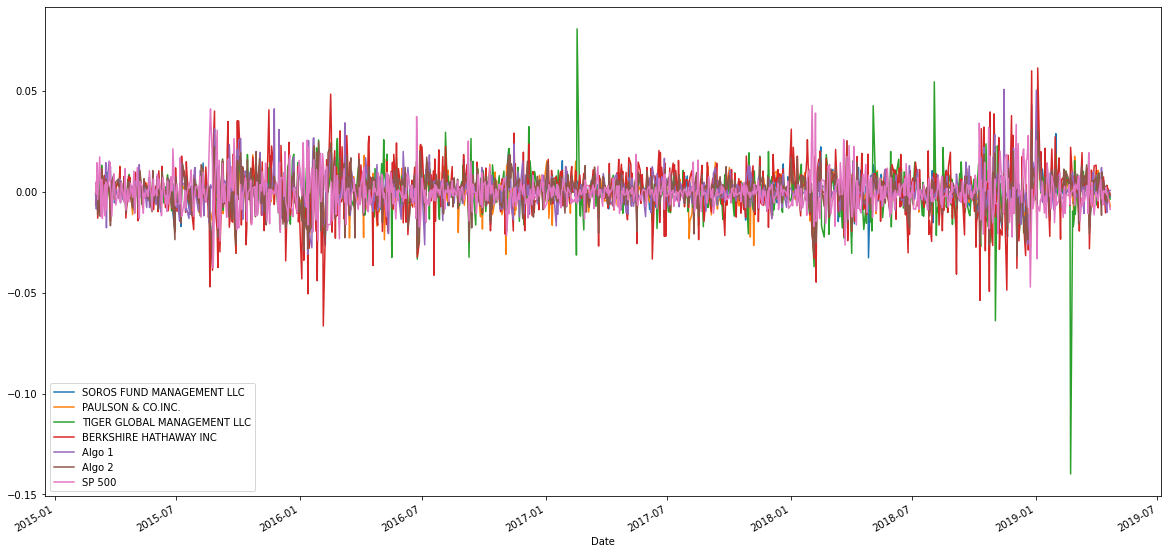

In [39]:
# Plot daily returns of all portfolios

all_portfolio_return.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

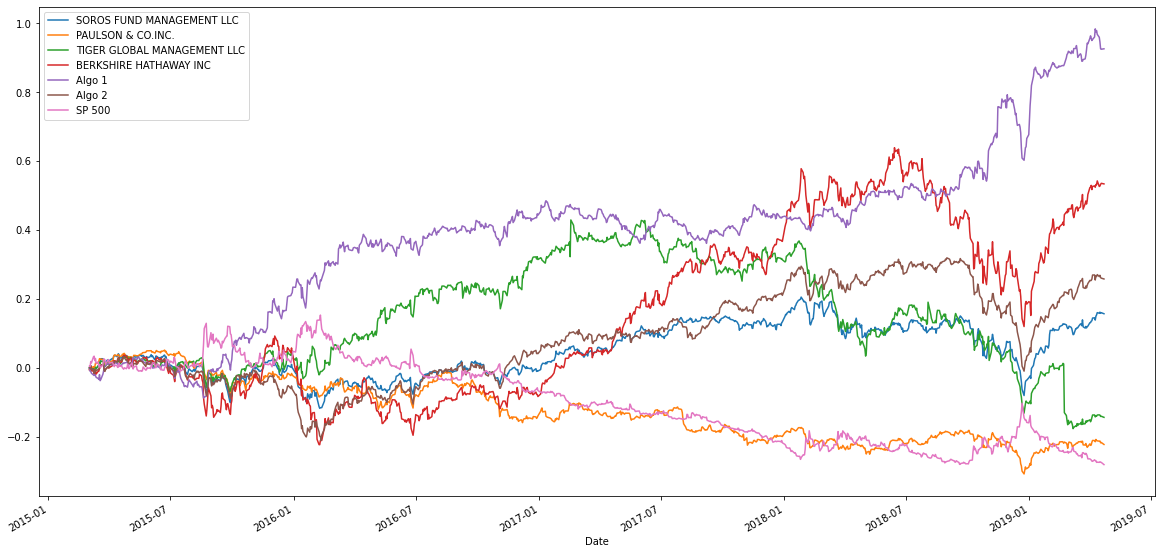

In [40]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns

cumulative_returns = (1 + all_portfolio_return.sort_index()).cumprod()-1
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

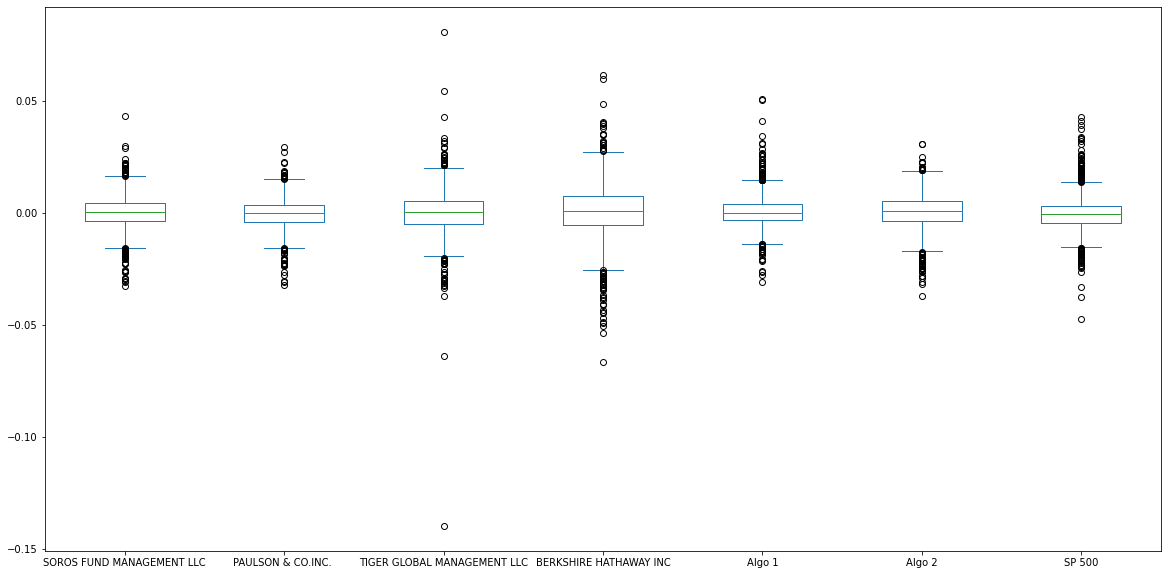

In [41]:
# Box plot to visually show risk

all_portfolio_return.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [42]:
# Calculate the daily standard deviations of all portfolios

all_portfolio_std = all_portfolio_return.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP 500                         0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [43]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500

all_portfolio_std[(all_portfolio_std['SP 500'] < all_portfolio_std)]

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = all_portfolio_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP 500                         0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

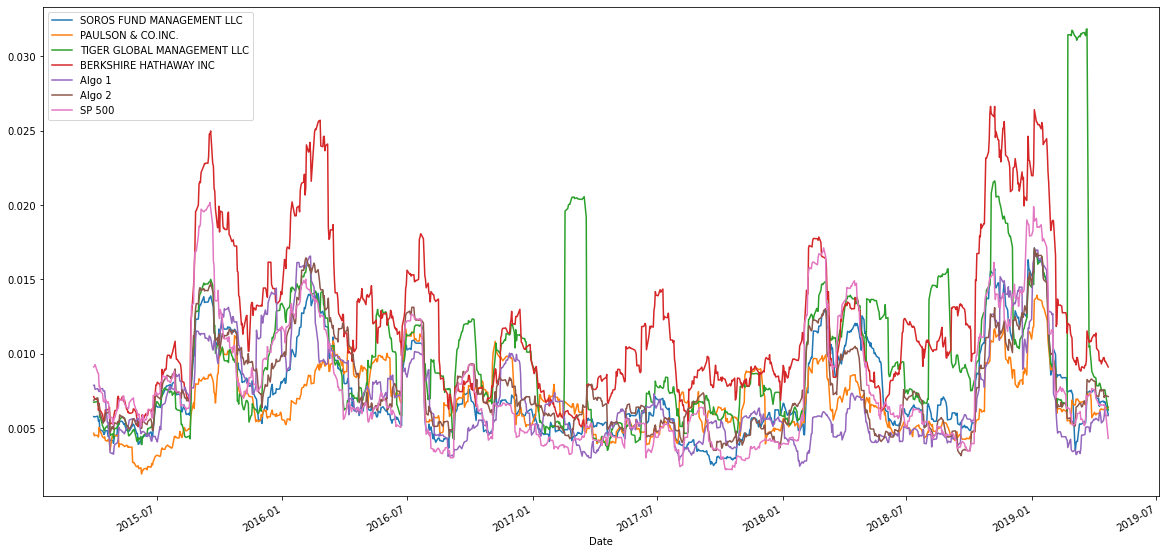

In [45]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation

all_portfolio_return.rolling(window=21).std().plot(figsize=[20,10])

### Calculate and plot the correlation

In [46]:
# Calculate the correlation

# Display de correlation matrix

all_portfolio_return.corr() 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

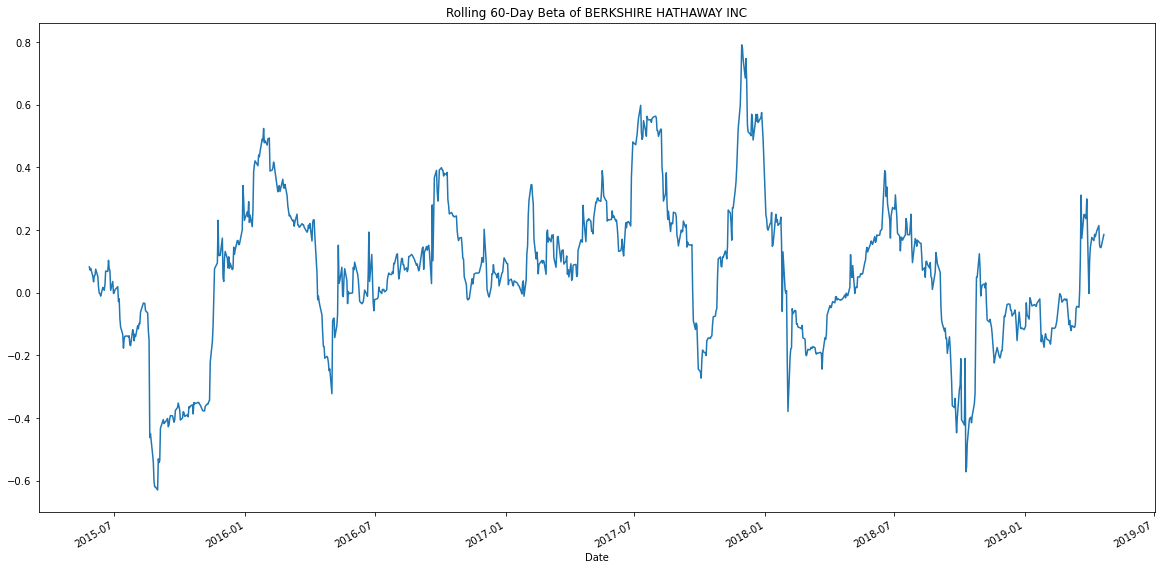

In [47]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend

covariance_bh = all_portfolio_return['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_portfolio_return['SP 500'])
variance_sp500 = all_portfolio_return['SP 500'].rolling(window=60).var()
rolling_beta_bh = covariance_bh/variance_sp500
#rolling_beta_bh.head()
rolling_beta_bh.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [48]:
# Use `ewm` to calculate the rolling window

all_portfolio_return.ewm(halflife=21).std().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Annualzied Sharpe Ratios

sharpe_ratios = (all_portfolio_return.mean() * 252) / (all_portfolio_return.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP 500                        -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

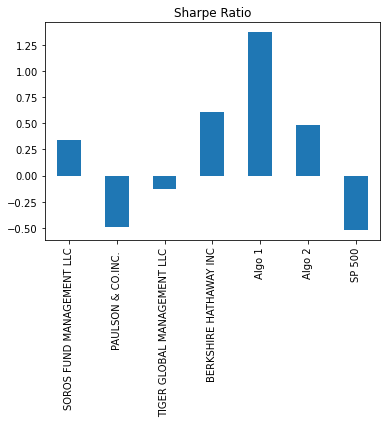

In [50]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind='bar', title='Sharpe Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [51]:
# Reading data from 1st stock

appl_path = Path('Resources/aapl_historical.csv')
appl_df = pd.read_csv(appl_path, index_col='Trade DATE', infer_datetime_format=True,  parse_dates=True, usecols=['Trade DATE','NOCP'])
appl_df.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [52]:
# Reading data from 2nd stock

cost_path = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
cost_df.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [53]:
# Reading data from 3rd stock

goog_path = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
goog_df.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [54]:
# Combine all stocks in a single DataFrame

my_portfolio = pd.concat([appl_df, cost_df, goog_df], axis='columns', join='inner')
my_portfolio.columns = ['APPL', 'COST', 'GOOG']

my_portfolio_return = my_portfolio.sort_index().pct_change() 
my_portfolio_return.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [55]:
# Reset Date index

my_portfolio_return.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [56]:
# Reorganize portfolio data by having a column per symbol


In [57]:
# Calculate daily returns

# Drop NAs

# Display sample data

my_portfolio_return.dropna(inplace=True)
my_portfolio_return.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [58]:
# Set weights

# Calculate portfolio return

# Display sample data

weights = [1/3, 1/3, 1/3]
weighted_portfolio = my_portfolio_return.dot(weights)
weighted_portfolio.sum()

0.14569723027355788

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [59]:
# Join your returns DataFrame to the original returns DataFrame

portfolio_return = pd.concat([weighted_portfolio, whale_daily_returns, sp500_daily_returns], axis='columns', join='inner')
portfolio_return.rename(columns={0:'MY PORTFOLIO'}, inplace=True)
portfolio_return.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,-0.007333


In [60]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_return.dropna(inplace=True)
portfolio_return.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,-0.007333


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [61]:
# Calculate the annualized `std`

annual_portfolio_std = portfolio_return.std() * np.sqrt(252)
annual_portfolio_std

MY PORTFOLIO                   0.211627
SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
SP 500                         0.152469
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [62]:
# Calculate rolling standard deviation

# Plot rolling standard deviation

portfolio_return.rolling(window=21).std().tail()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP 500
2019-04-15,0.007588,0.006804,0.006225,0.007525,0.009729,0.006532
2019-04-16,0.007507,0.006711,0.006224,0.007532,0.009731,0.006571
2019-04-17,0.007668,0.006773,0.006370,0.007574,0.009485,0.006505
2019-04-18,0.007482,0.006633,0.006303,0.007328,0.009475,0.006137
2019-04-22,0.006539,0.005915,0.006400,0.006197,0.009104,0.004302


### Calculate and plot the correlation

<AxesSubplot:>

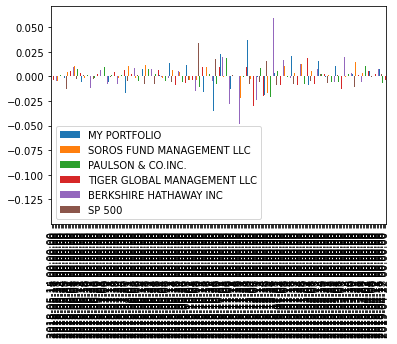

In [63]:
# Calculate and plot the correlation

correlation = portfolio_return.corr()
correlation
portfolio_return.plot.bar()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

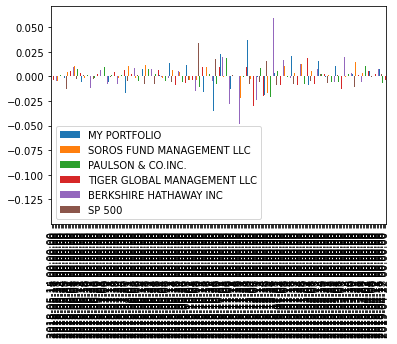

In [64]:
# Calculate and plot Beta

covariance = portfolio_return['MY PORTFOLIO'].cov(portfolio_return['SP 500'])
variance = portfolio_return['SP 500'].var()
beta = covariance/variance
beta
portfolio_return.plot.bar()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [65]:
# Calculate Annualized Sharpe Ratios


In [66]:
# Annualzied Sharpe Ratios

annual_portfolio_sharpe_ratio = (portfolio_return.mean() * 252)/(portfolio_return.std() * np.sqrt(252))
annual_portfolio_sharpe_ratio

MY PORTFOLIO                   0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
SP 500                        -0.427676
dtype: float64

<AxesSubplot:>

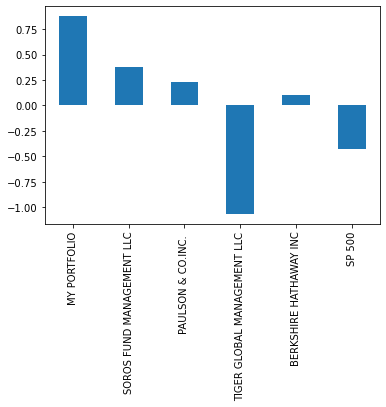

In [67]:
# Visualize the sharpe ratios as a bar plot

annual_portfolio_sharpe_ratio.plot.bar()

### How does your portfolio do?

Write your answer here!

In [69]:
answer = "good"
answer

'good'